In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

In [44]:
#Reading ht csv file
df =pd.read_csv("C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\Data_Analytics\Analytics.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,0.816895,0,1,1,2,1,0.928786,0.631290,1,1
1,51676,0,0.743652,0,0,1,3,0,0.787090,0.427261,2,1
2,31112,1,0.975586,0,1,1,2,0,0.271835,0.532876,2,1
3,60182,0,0.597168,0,0,1,2,1,0.621313,0.578483,3,1
4,1665,0,0.963379,1,0,1,3,0,0.636778,0.328847,2,1


# Selecting Important Features

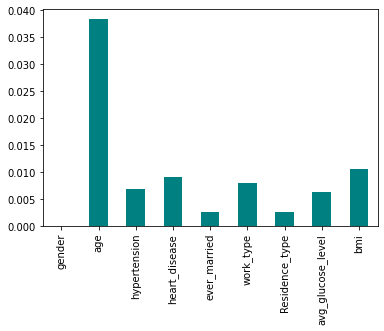

In [45]:
from sklearn.feature_selection import mutual_info_classif

X=df.iloc[:,1:len(df.columns)-2]
y=df['stroke']

importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-2])
feat_imp.plot(kind='bar',color='teal')
plt.show()

# SELECTING FEATURES AND CREATING DATAFRAME

In [47]:
# MODEL LOGISTIC REGRESSION
X_LR = df.iloc[:,2:8]
#print(X_LR)

Y_LR = df['stroke']
#print(Y_LR)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, test_size=0.3,random_state=42)

# print(len(y_train_LR))
# print(len(x_train_LR))

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state=0)  
classifier.fit(x_train_LR, y_train_LR)

#PREDICTING THE TEST RESULT  
y_pred_LR = classifier.predict(x_test_LR)
#print(y_pred_LR)


#CREATING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix  
cmatrix = confusion_matrix(y_test_LR,y_pred_LR)  

print(cmatrix)

#Precision
from sklearn.metrics import classification_report
print(classification_report(y_test_LR,y_pred_LR))


[[1444    0]
 [  89    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [57]:
# X = df.drop(['Residence_type','ever_married','stroke'],axis=1)
X_dt = df.iloc[:,2:8]
#print(X)

Y_dt = df['stroke']
#print(Y)

In [58]:
#DECISION TREE CLASSIFICATION
from sklearn.model_selection import train_test_split

x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.3,random_state=0)

In [59]:
from sklearn.tree import DecisionTreeClassifier  
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0)  
DT_model.fit(x_train_dt, y_train_dt)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
#Predicting the test set result  
y_pred_dt= DT_model.predict(x_test_dt)

# Hyperparameters Tuning

In [61]:
param_list = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [62]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DT_model, param_grid=param_list, cv=10)

In [63]:
grid.fit(x_train_dt, y_train_dt)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [54]:
grid.best_score_

0.9516360734237829

In [64]:
#CREATING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix  
cmatrix = confusion_matrix(y_test_dt,y_pred_dt)
print(cmatrix)

[[1447   10]
 [  76    0]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.94      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533

